<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/Stroke_Prediction_Dataset_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Importing the data
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv', index_col = 0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
# Drop irrelevant columns
df = df.reset_index()  # Reset the index to make 'id' a regular column
df.drop(['id'], axis=1, inplace=True)

In [60]:
# Preprocessing
# Handle missing values (BMI has nulls)
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [61]:
# Seperating the input and output features
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [62]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [63]:
# Split data
X = df.drop(['stroke'], axis=1) # Remove 'id' from the list of columns to drop
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Train Random Forest
clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Address class imbalance
    random_state=42
)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [65]:
# Taking predictions from the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



In [66]:
# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

age                  0.395484
avg_glucose_level    0.207963
bmi                  0.183686
smoking_status       0.046979
work_type            0.042770
hypertension         0.029022
ever_married         0.025587
gender               0.023528
heart_disease        0.023481
Residence_type       0.021498
dtype: float64


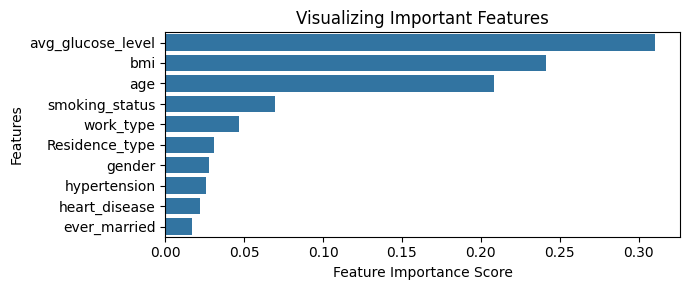

In [68]:
# Feature Importance Plot
plt.figure(figsize=(7, 3))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.tight_layout()
plt.show()